In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../data/bitcoin_price_Training - Training.csv')

In [4]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,31-Jul-17,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,30-Jul-17,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,29-Jul-17,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,28-Jul-17,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,27-Jul-17,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,2-May-13,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,1-May-13,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,30-Apr-13,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,29-Apr-13,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [5]:
df.isnull().any()

Date          False
Open          False
High          False
Low           False
Close         False
Volume        False
Market Cap    False
dtype: bool

In [6]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [8]:
type(df['Market Cap'][0])

str

In [9]:
#removing , from numbers
df['Market Cap'] = df['Market Cap'].str.replace(',','')
df['Volume'] = df['Volume'].str.replace(',','')

In [10]:
df['Volume'].value_counts(normalize=True)

-           0.156170
40465700    0.000643
41383000    0.000643
41302400    0.000643
28918900    0.000643
              ...   
81987900    0.000643
42762300    0.000643
39657600    0.000643
50582500    0.000643
28198500    0.000643
Name: Volume, Length: 1314, dtype: float64

In [11]:
#replacing - with null in Volume column
df['Volume'] = df['Volume'].replace('-',np.nan)

In [12]:
df['Volume'].isnull().sum()

243

In [13]:
df['Market Cap'].isnull().sum()

0

In [14]:
df['Market Cap'] = df['Market Cap'].astype(np.float64)
df['Volume'] = df['Volume'].astype(np.float64)

In [15]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,31-Jul-17,2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
1,30-Jul-17,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2,29-Jul-17,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
3,28-Jul-17,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
4,27-Jul-17,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10


In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
#setting Date column as Index
df = df.set_index('Date')

In [18]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,4.553580e+10
2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,4.489070e+10
2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,4.624670e+10
2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,4.414440e+10
2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,4.181650e+10


## Single series

In [19]:
df_new = df[['Open']]
df_new

,Open
Date,
2017-07-31,2763.24
2017-07-30,2724.39
2017-07-29,2807.02
2017-07-28,2679.73
2017-07-27,2538.71
...,...
2013-05-02,116.38
2013-05-01,139.00
2013-04-30,144.00


<AxesSubplot:xlabel='Date'>

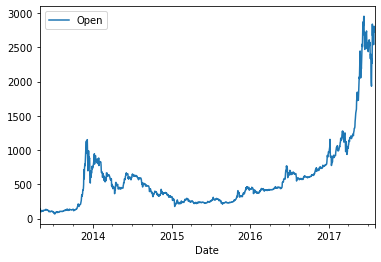

In [20]:
df_new.plot()

In [21]:
#Augemnted dickey fuller test
from statsmodels.tsa.stattools import adfuller

In [22]:
test_results = adfuller(df['Open'])

In [23]:
test_results

(-4.876850044292943,
 3.867930127634502e-05,
 24,
 1531,
 {'1%': -3.4346284441307184,
  '5%': -2.863429668579316,
  '10%': -2.5677760318409732},
 14777.730457650978)

In [24]:
def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic',
             'p-value',
             '#Lags uesd',
             'Number of observations used']
    for value,label in zip(result, labels):
        print('{} : {}'.format(label, value))
        
    #this threshold is used to decide if stationary or not
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adfuller_test(df_new['Open'])

#Since p value is less than 0.05, this series is stationary

ADF Test Statistic : -4.876850044292943
p-value : 3.867930127634502e-05
#Lags uesd : 24
Number of observations used : 1531
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


The value of d, therefore, is the minimum number of differencing needed to make the series stationary.
And if the time series is already stationary, then d = 0

‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors.

‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model

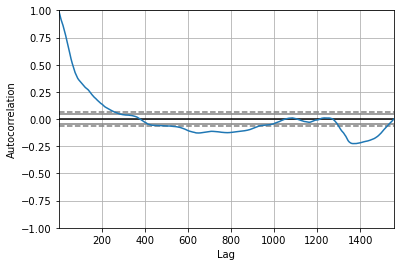

In [26]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_new['Open'])
plt.show()

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [28]:
import statsmodels.api as sm

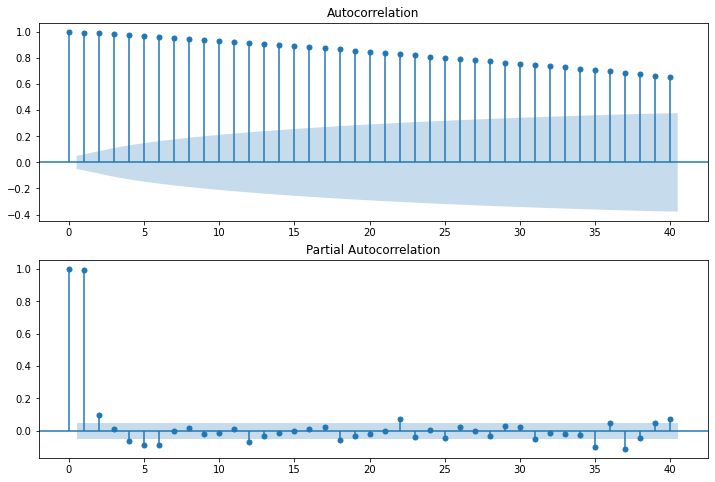

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_new['Open'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_new['Open'].iloc[13:],lags=40,ax=ax2)